## Assignment : 


The Dataset consists of some customer information and their associated loan information . Task here is to clean the data, do exploratory data analysis on it and infer from the data about the trends in loans taken and products bought.




In [1]:
#importing libraries to work with
import pandas as pd                     # data processing
import numpy as np                      # multi-dimensional arrays and matrices
import matplotlib.pyplot as plt         # data visualization
import seaborn as sns                   # data Visualization

In [2]:
data = pd.read_csv('Data Analyst assignment data.csv')

In [3]:
#first 5 rows 
data.head()

,Unnamed: 0,Village,Group ID,Member ID,Branch Name,Circle Name,Loan Amount,Product Type,Name of Model,Product Detail,...,Manufacturer Name,Loan Account Number,Loan Application Date,Product Installed Date,Document Signature Date,loan_id,household_id,product_id,branch_id,partner_id
0,0,Honnavalli,27674,1,Tiptur,J.C Pura,15500,Solar Light Selco,SH4HLS,4 COMBI Light,...,SELCO,99155,2018-06-12T00:00:00+05:30,2018-06-18T00:00:00+05:30,2018-06-12T00:00:00+05:30,57-99155,27674-1,50.0,55.0,1
1,1,Amaramudnooru,650604,15,Sullia,Bellare,53000,Solar Light Selco,S15HLS,12 CFL + 2 Fan,...,SELCO,369065,2019-01-07T00:00:00+05:30,2019-01-10T00:00:00+05:30,2019-01-07T00:00:00+05:30,4-369065,650604-15,42.0,4.0,1
2,2,PURASABHE,376321,6,Holenarasipura,PURASABHE,9000,Solar Light Selco,EH2HLS,2 LED Light,...,SELCO,169976,2018-06-02T00:00:00+05:30,2018-06-04T00:00:00+05:30,2018-06-02T00:00:00+05:30,102-169976,376321-6,35.0,94.0,1
3,3,Mekalmardi,60589,4,Bailahongal,Nesargi,8000,Solar Light Selco,EH2HLS,2 LED Light,...,SELCO,137608,2018-09-24T00:00:00+05:30,2018-09-25T00:00:00+05:30,2018-09-24T00:00:00+05:30,50-137608,60589-4,35.0,48.0,1
4,4,Bijkal,287722,2,Kushtagi,kushtagi,36000,Solar Light Selco,S10HLS,10 CFL,...,SELCO,114405,2019-03-15T00:00:00+05:30,2019-03-18T00:00:00+05:30,2019-03-15T00:00:00+05:30,83-114405,287722-2,40.0,80.0,1


In [4]:
# no.of datavalues and no. of features in the dataset
data.shape

(5000, 21)

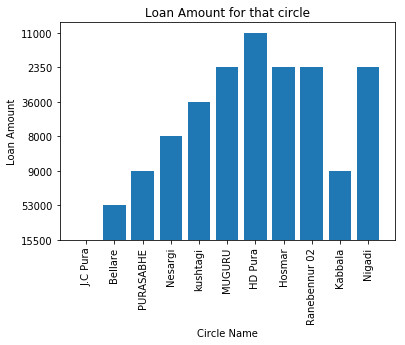

In [12]:
Loan_Amount = data['Loan Amount'].loc[0:10]
y = Loan_Amount

Village_Name = data['Circle Name'].loc[0:10]
X = Village_Name

plt.bar(X,y)
plt.title('Loan Amount for that circle')
plt.xlabel('Circle Name')
plt.xticks(rotation=90)
plt.ylabel('Loan Amount')
plt.show()



Data set contains 5000 datavalues and 21 columns or features

In [13]:
# Information about complete features
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 21 columns):
Unnamed: 0                 5000 non-null int64
Village                    4993 non-null object
Group ID                   5000 non-null int64
Member ID                  5000 non-null int64
Branch Name                5000 non-null object
Circle Name                5000 non-null object
Loan Amount                5000 non-null object
Product Type               5000 non-null object
Name of Model              5000 non-null object
Product Detail             1413 non-null object
Institution Name           5000 non-null object
Manufacturer Name          5000 non-null object
Loan Account Number        5000 non-null int64
Loan Application Date      5000 non-null object
Product Installed Date     5000 non-null object
Document Signature Date    5000 non-null object
loan_id                    5000 non-null object
household_id               5000 non-null object
product_id                 5000 n

Therefore , features contains int (numerical) , object (categorical) as well as float types in it.       
Mainly , There is a missing values in Village and Product Detail . 

In [14]:
#splitting Numerical features and categorical features seperately
numerical_features = data.select_dtypes(include = ['int64','float64'])
numerical_features.columns.tolist()

['Unnamed: 0',
 'Group ID',
 'Member ID',
 'Loan Account Number',
 'product_id',
 'branch_id',
 'partner_id']

In [15]:
#categorical features
categorical_features = data.select_dtypes(include = 'object')
categorical_features.columns.tolist()

['Village',
 'Branch Name',
 'Circle Name',
 'Loan Amount',
 'Product Type',
 'Name of Model',
 'Product Detail',
 'Institution Name',
 'Manufacturer Name',
 'Loan Application Date',
 'Product Installed Date',
 'Document Signature Date',
 'loan_id',
 'household_id']

From the dataset , we can infer that most of the features contains categorical values than numerical values

Now lets take a look at how the dataset is distributed,

In [16]:
data.describe(include = 'object')

,Village,Branch Name,Circle Name,Loan Amount,Product Type,Name of Model,Product Detail,Institution Name,Manufacturer Name,Loan Application Date,Product Installed Date,Document Signature Date,loan_id,household_id
count,4993,5000,5000,5000,5000,5000,1413,5000,5000,5000,5000,5000,5000,5000
unique,2543,160,1015,87,3,14,12,1,2,334,228,333,5000,4994
top,Bijapur CMC,Chikodi,KASABA,2350,Greenway Jumbo Stove GJS1,GJS1,2 CFL,SKDRDP,Greenway Grameena Infra,2018-09-20T00:00:00+05:30,2018-09-24T00:00:00+05:30,2018-09-20T00:00:00+05:30,3-945421,531142-1
freq,34,121,70,3148,3151,3151,382,5000,3587,79,148,79,1,2


In [17]:
Product_type = data['Product Type'].value_counts().values
X = data['Product Type'].unique().tolist()
y = Product_type.tolist()

Text(0, 0.5, 'value')

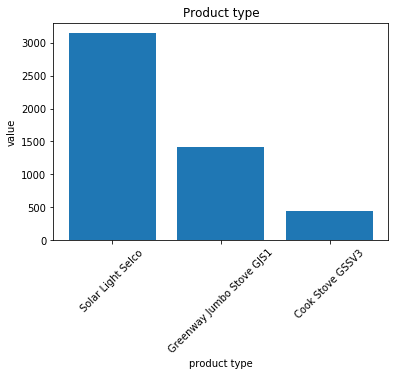

In [19]:
#count of Prduct Type

plt.bar(X,y)
plt.title('Product type')
plt.xlabel('product type')
plt.xticks(rotation=45)
plt.ylabel('value')

Datavalue in 4113rd row of Loan Amount has  unnecessary value in it . Changing that value to zero

In [22]:
data['Loan Amount'].loc[4110 : 4115]

4110                        29500
4111                         2350
4112                         2350
4113    2017-12-09T00:00:00+05:30
4114                         2350
4115                         2350
Name: Loan Amount, dtype: object

In [23]:
#dropped that unnecessary value's row
data = data.drop(data.index[4113])

In [24]:
#changing object to integer value for Loan Amount feature
data['Loan Amount'] = pd.to_numeric(data['Loan Amount'])

In [25]:
data['Loan Amount'].dtypes

dtype('int64')

### Dropping Unnecessary columns :
    By relating the feature values

Dropping ,       
Group ID , Member ID , Patner ID , loan_id , household_id ,Institution Name , Product Detail- it doesn't give relevant information for our model               
instead of branch Name , we can take branch ID - These both features gives same information about branch                  
Same for Name of Model , we can take product_id instead.         

In [26]:
#Both gives same information by seeing the id as well names in it

In [27]:
data['product_id'].value_counts()

38.0    3151
37.0     436
43.0     382
35.0     357
36.0     289
50.0     179
44.0      91
47.0      58
41.0      17
40.0      16
48.0       7
46.0       6
23.0       5
42.0       5
Name: product_id, dtype: int64

In [28]:
data.drop(['Unnamed: 0','Name of Model','Group ID' , 'Member ID','Circle Name' ,'partner_id' , 'loan_id' ,
           'household_id' , 'Institution Name' , 'Branch Name','Product Detail'],axis = 1, inplace = True)

In [29]:
#here Village has NaN values.
data.isnull().sum()

Village                    7
Loan Amount                0
Product Type               0
Manufacturer Name          0
Loan Account Number        0
Loan Application Date      0
Product Installed Date     0
Document Signature Date    0
product_id                 0
branch_id                  0
dtype: int64

In [30]:
# Dropping  those 7 rows.
data.dropna(inplace = True )

In [31]:
data.isnull().sum()

Village                    0
Loan Amount                0
Product Type               0
Manufacturer Name          0
Loan Account Number        0
Loan Application Date      0
Product Installed Date     0
Document Signature Date    0
product_id                 0
branch_id                  0
dtype: int64

### Feature Engineering :

Now, Dataset contains less features in it . By doing Feature Engineering we can increase the feature value    

Loan Application Date , Product Installed Date , Document Signature Date features has unnecessary values that is impossible to model    


Creating New features of values containing Day , Month and year of those three features

In [32]:
#Changing from object values to datetime values
data['Loan Application Date'] = pd.to_datetime(data['Loan Application Date'])
data['Product Installed Date'] = pd.to_datetime(data['Product Installed Date'])
data['Document Signature Date'] = pd.to_datetime(data['Document Signature Date'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4992 entries, 0 to 4999
Data columns (total 10 columns):
Village                    4992 non-null object
Loan Amount                4992 non-null int64
Product Type               4992 non-null object
Manufacturer Name          4992 non-null object
Loan Account Number        4992 non-null int64
Loan Application Date      4992 non-null datetime64[ns]
Product Installed Date     4992 non-null datetime64[ns]
Document Signature Date    4992 non-null datetime64[ns]
product_id                 4992 non-null float64
branch_id                  4992 non-null float64
dtypes: datetime64[ns](3), float64(2), int64(2), object(3)
memory usage: 429.0+ KB


In [34]:
# Creating New features of values containing Day , Month and year of those three features
data['Loan_Applied_day'] = data['Loan Application Date'].dt.day
data['Loan_Applied_month'] = data['Loan Application Date'].dt.month
data['Loan_Applied_year'] = data['Loan Application Date'].dt.year

In [35]:
data['Product_Installed_day'] = data['Product Installed Date'].dt.day
data['Product_Installed_month'] = data['Product Installed Date'].dt.month
data['Product_Installed_year'] = data['Product Installed Date'].dt.year

In [36]:
data['Document_signed_day'] = data['Document Signature Date'].dt.day
data['Document_signed_month'] = data['Document Signature Date'].dt.month
data['Document_signed_year'] = data['Document Signature Date'].dt.year

Dropping that unnecessary feature because we got our information by seperatiing the day , month , year

In [37]:
data.drop(['Loan Application Date','Product Installed Date','Document Signature Date'],axis = 1 , inplace = True)

In [38]:
data.head()

,Village,Loan Amount,Product Type,Manufacturer Name,Loan Account Number,product_id,branch_id,Loan_Applied_day,Loan_Applied_month,Loan_Applied_year,Product_Installed_day,Product_Installed_month,Product_Installed_year,Document_signed_day,Document_signed_month,Document_signed_year
0,Honnavalli,15500,Solar Light Selco,SELCO,99155,50.0,55.0,11,6,2018,17,6,2018,11,6,2018
1,Amaramudnooru,53000,Solar Light Selco,SELCO,369065,42.0,4.0,6,1,2019,9,1,2019,6,1,2019
2,PURASABHE,9000,Solar Light Selco,SELCO,169976,35.0,94.0,1,6,2018,3,6,2018,1,6,2018
3,Mekalmardi,8000,Solar Light Selco,SELCO,137608,35.0,48.0,23,9,2018,24,9,2018,23,9,2018
4,Bijkal,36000,Solar Light Selco,SELCO,114405,40.0,80.0,14,3,2019,17,3,2019,14,3,2019


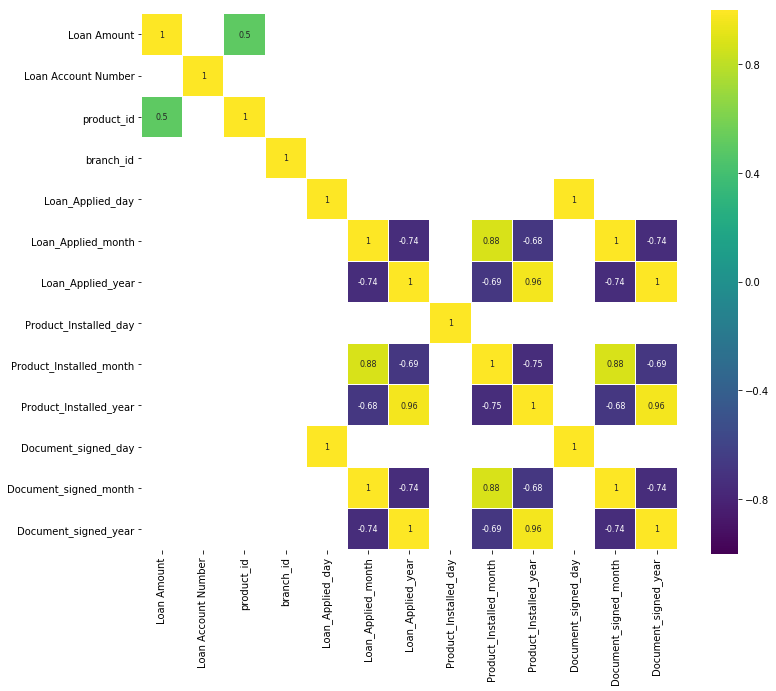

In [39]:
corr = data.corr() # We already examined SalePrice correlations
plt.figure(figsize=(12, 10))

sns.heatmap(corr[(corr >= 0.5) | (corr <= -0.4)], 
            cmap='viridis', vmax=1.0, vmin=-1.0, linewidths=0.1,
            annot=True, annot_kws={"size": 8}, square=True);

Here Most of the features seems highly correlated . It seems that loan_applied_month and Product_installed_month is highly correlated. That means within that Loan Applied month itself , product get installed, and also person signed the document

In [42]:
final_data = data.copy()

### here is the final cleaned data

In [43]:

final_data.head(10)

,Village,Loan Amount,Product Type,Manufacturer Name,Loan Account Number,product_id,branch_id,Loan_Applied_day,Loan_Applied_month,Loan_Applied_year,Product_Installed_day,Product_Installed_month,Product_Installed_year,Document_signed_day,Document_signed_month,Document_signed_year
0,Honnavalli,15500,Solar Light Selco,SELCO,99155,50.0,55.0,11,6,2018,17,6,2018,11,6,2018
1,Amaramudnooru,53000,Solar Light Selco,SELCO,369065,42.0,4.0,6,1,2019,9,1,2019,6,1,2019
2,PURASABHE,9000,Solar Light Selco,SELCO,169976,35.0,94.0,1,6,2018,3,6,2018,1,6,2018
3,Mekalmardi,8000,Solar Light Selco,SELCO,137608,35.0,48.0,23,9,2018,24,9,2018,23,9,2018
4,Bijkal,36000,Solar Light Selco,SELCO,114405,40.0,80.0,14,3,2019,17,3,2019,14,3,2019
5,Vatalu,2350,Greenway Jumbo Stove GJS1,Greenway Grameena Infra,160991,38.0,66.0,31,12,2018,3,1,2019,31,12,2018
6,H.D.Pura,11000,Solar Light Selco,SELCO,108271,43.0,77.0,30,11,2017,3,12,2017,30,11,2017
7,NELLIKAR,2350,Greenway Jumbo Stove GJS1,Greenway Grameena Infra,945091,38.0,3.0,12,1,2019,13,1,2019,12,1,2019
8,Kodiyal C,2350,Greenway Jumbo Stove GJS1,Greenway Grameena Infra,126625,38.0,34.0,19,11,2018,21,11,2018,19,11,2018
9,Navelehal,9000,Solar Light Selco,SELCO,191584,35.0,88.0,25,9,2018,27,9,2018,25,9,2018
